#Task 1: Define the Problem

### Choose the best model to predict the price of a diamond based on this data set.

#Task 2a: Install the Needed Libraries

In [26]:
#Installed already, only need to import

#Task 2b: Import the Needed Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#Task 3: Load the Data

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/diamonds.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [29]:
df.head()

# 10 columns

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Get Data Info

In [30]:
df.info()

# 53,940 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [31]:
df.describe()

#Basic stats for all numerical variables.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Find Missing Values

In [32]:
df.isnull().sum()

#There is no missing data in the data set.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#Task 5: Perform Data Cleaning

In [33]:
df['cut'].unique()

#Want to see all values in this column to see if they are worth transforming into a numerical scale.

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [34]:
#cut_mapping = {
 #   'Ideal': 5,
#    'Premium': 4,
 #   'Very Good': 3,
 #   'Good': 2,
 #   'Fair': 1
#}

#df['cut rating'] = df['cut'].map(cut_mapping)

#Transforming the 'cut' column into numerical values where 5 is ideal etc.  This can now be included in the model.
#Did not end up using this as it didn't make a difference in the model.

In [35]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Task 6: Visualize Cleaned up Dataset

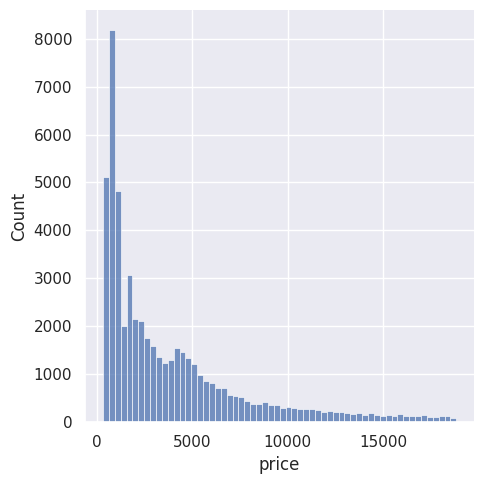

In [36]:
sns.displot(df['price'], kde=False, bins=60)

#Distributed of prices of diamonds.
#Prices are concentrated in the "lower" end.

Text(0.5, 1.0, 'Carat vs Price')

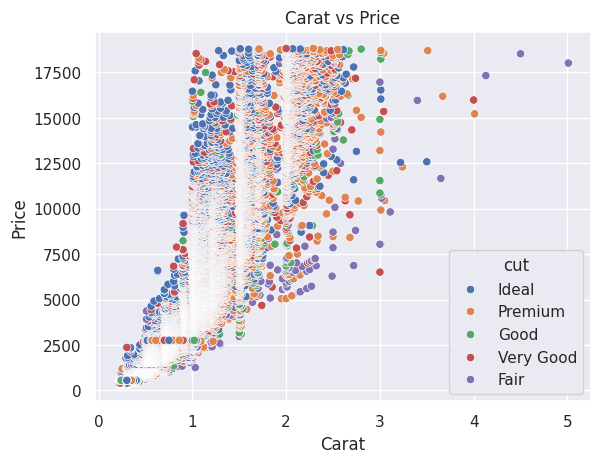

In [37]:
sns.scatterplot(x='carat', y='price', data=df, hue = 'cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Carat vs Price')

#Plot of Carat vs Price showing a somewhat positive correlation between carat and price.

Text(0.5, 1.0, 'Cut vs Price')

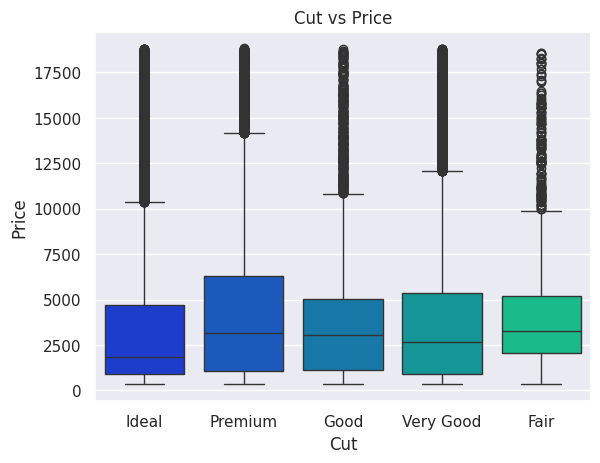

In [38]:
sns.boxplot(x='cut', y='price', data=df, hue='cut', palette='winter')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Cut vs Price')

#There appear to be a lot of outliers on the higher end of the price range.
#A boxplot is better than scatterplot as this a categorical variable.

Text(0.5, 1.0, 'Depth vs Price')

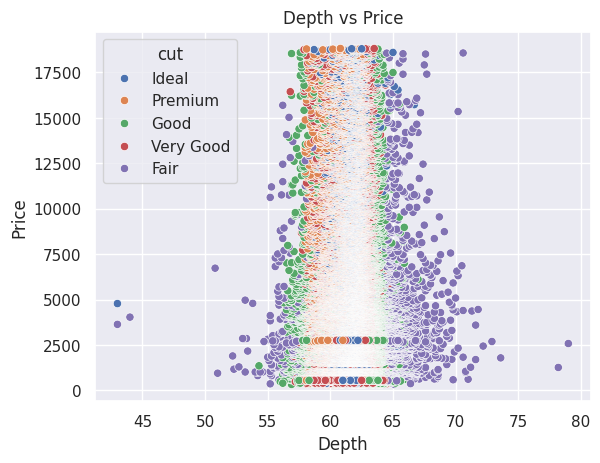

In [39]:
sns.scatterplot(x='depth', y='price', data=df, hue = 'cut')
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Depth vs Price')

#Not much correlation here, but interesting that diamonds with the most and least depth are of a fair cut (or lowest cut).

Text(0.5, 1.0, 'Table vs Price')

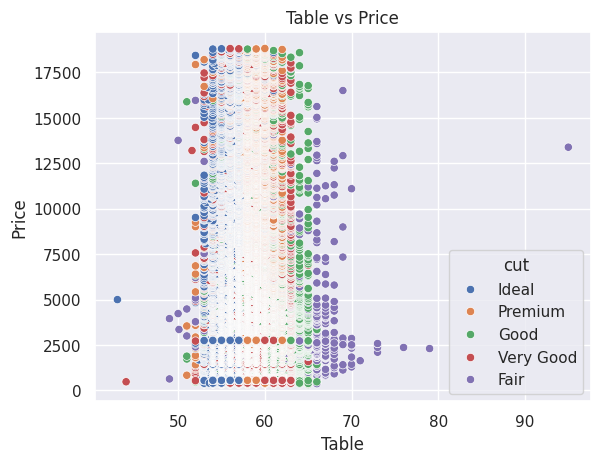

In [40]:
sns.scatterplot(x='table', y='price', data=df, hue = 'cut')
plt.xlabel('Table')
plt.ylabel('Price')
plt.title('Table vs Price')

#Also not much correlation between table and price.

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
x = df[['carat', 'depth', 'table', 'x', 'y', 'z']].values
y = df['price'].values

#Split data into x with all numerical variables and y as price
#Removed 'cut' as a variable as the model did not recognize those terms.  When changed to a numerical scale, it did not impact the models' accuracy.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

#Task 9: Choose the ML Method to follow

In [44]:
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
LinearRegressor_model = LinearRegression()

#Try them all, except for logistic regression because that won't work. We are predicting a price, not a yes/no or 0/1.

#Task 10: Train the ML Model

In [45]:
models = [DecisionTree_model, RandomForest_model, LinearRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

#Train all three models using for loop.

DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
LinearRegression() is trained!


#Task 11: Test the Model

In [46]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_LinearRegressor = LinearRegressor_model.score(x_test, y_test)

#Test models for accuracy using the x_test and y_test data.

In [52]:
models = {'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest, 'LinearRegressor_model': accuracy_LinearRegressor}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

#Print out the accuracy score for each model.

The accuracy score for the DecisionTree_model is 77.78%
The accuracy score for the RandomForest_model is 88.31%
The accuracy score for the LinearRegressor_model is 85.99%


#Task 12: Export the Model

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
pickle.dump(RandomForest_model, open('/content/drive/MyDrive/Colab Notebooks/Predictive Analytics Course/Projects/Diamond Price Prediction/diamondmodel.pkl', 'wb'))

## Explanation of Model Chosen

I chose the random forest model as it was the most accurate of the three tested, although the linear regression model is close.

This data set does not have a ton of variables so a linear regression could potentially work. However, not all variables appear to have a linear relationship to price. The random forest model will handle interactions between different features better. As there are many measurements of size that are likely interrelated, this could be an issue.
There are also a lot of outliers in the data set, which linear regression is more sensitive to.
